# Região Grande

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np

In [2]:
path = [i for i in os.listdir() if i[:3] in ['cl-', 'br-', 'scn']]
path

['br-qmmm-am1',
 'br-qmmm-dftb3',
 'br-qmmm-pm3',
 'br-qmmm-pm6',
 'cl-qmmm-am1',
 'cl-qmmm-dftb3',
 'cl-qmmm-pm3',
 'cl-qmmm-pm6',
 'scn-qmmm-am1',
 'scn-qmmm-dftb3',
 'scn-qmmm-pm3',
 'scn-qmmm-pm6']

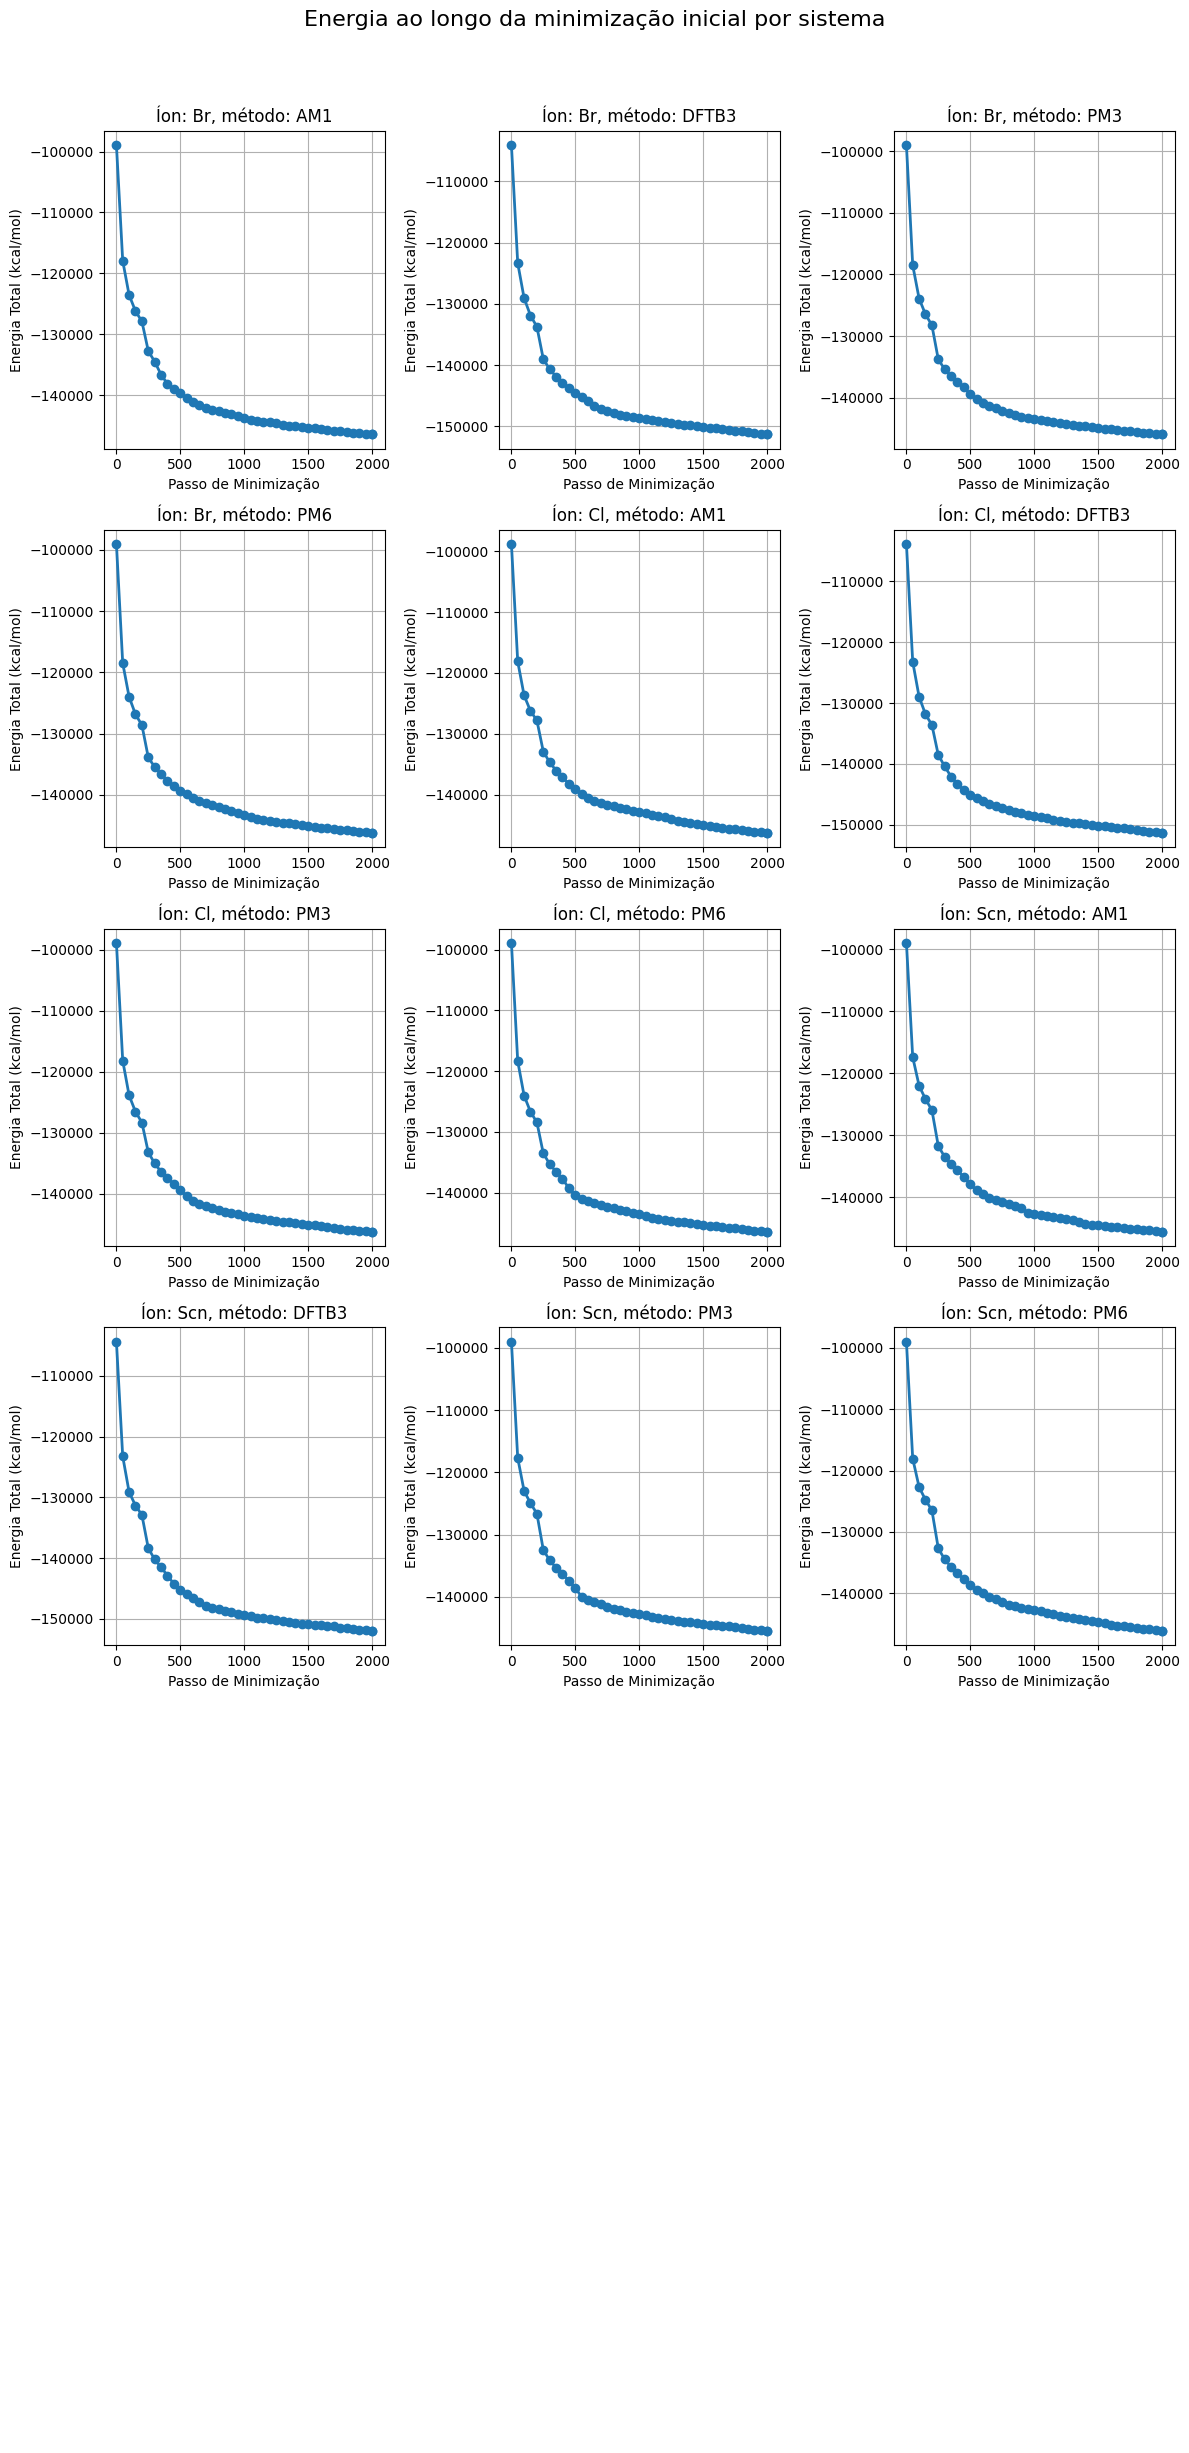

In [3]:
num_systems = len(path)
rows = (num_systems + 1) // 2
cols = 3 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
fig.suptitle("Energia ao longo da minimização inicial por sistema", fontsize=16, y=1.02)

# Se tivermos apenas um sistema, axes não será um array
if num_systems == 1:
    axes = np.array([axes])

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

for i, current_path in enumerate(path):
    steps = []
    energies = []
    
    with open(f"{current_path}/min.init.log") as f:
        for line in f:
            if re.match(r'^\s*\d+\s+-?\d+\.\d+', line):
                parts = line.split()
                try:
                    steps.append(int(parts[0]))
                    energies.append(float(parts[1]))
                except (IndexError, ValueError):
                    continue
    
    ax = axes[i]
    ax.plot(steps, energies, marker='o', linewidth=2)
    ax.set_xlabel("Passo de Minimização", fontsize=10)
    ax.set_ylabel("Energia Total (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", 
                 fontsize=12)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

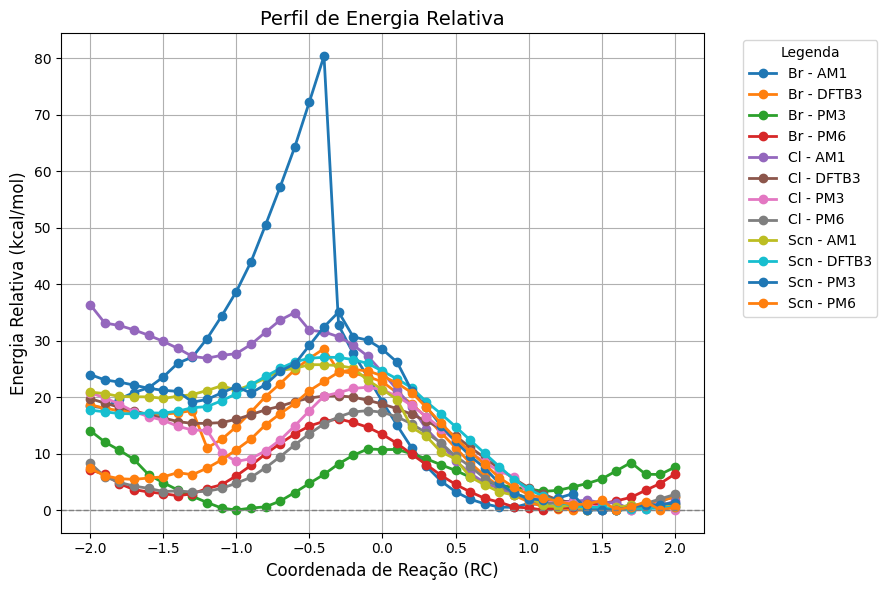

In [4]:
plt.figure(figsize=(9, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(path)))

for i, current_path in enumerate(path):
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    
    min_energy = df["EAMBER"].min()
    df["E_relativa"] = df["EAMBER"] - min_energy
    
    plt.plot(
        df["RC"], 
        df["E_relativa"], 
        marker='o', 
        linewidth=2,
        label=f"{current_path.split('-')[0].title()} - {current_path.split('-')[-1].upper()}", 
        #color=colors[i]  # Usa cores diferentes
    )

plt.xlabel("Coordenada de Reação (RC)", fontsize=12)
plt.ylabel("Energia Relativa (kcal/mol)", fontsize=12)
plt.title("Perfil de Energia Relativa", fontsize=14)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(True)
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

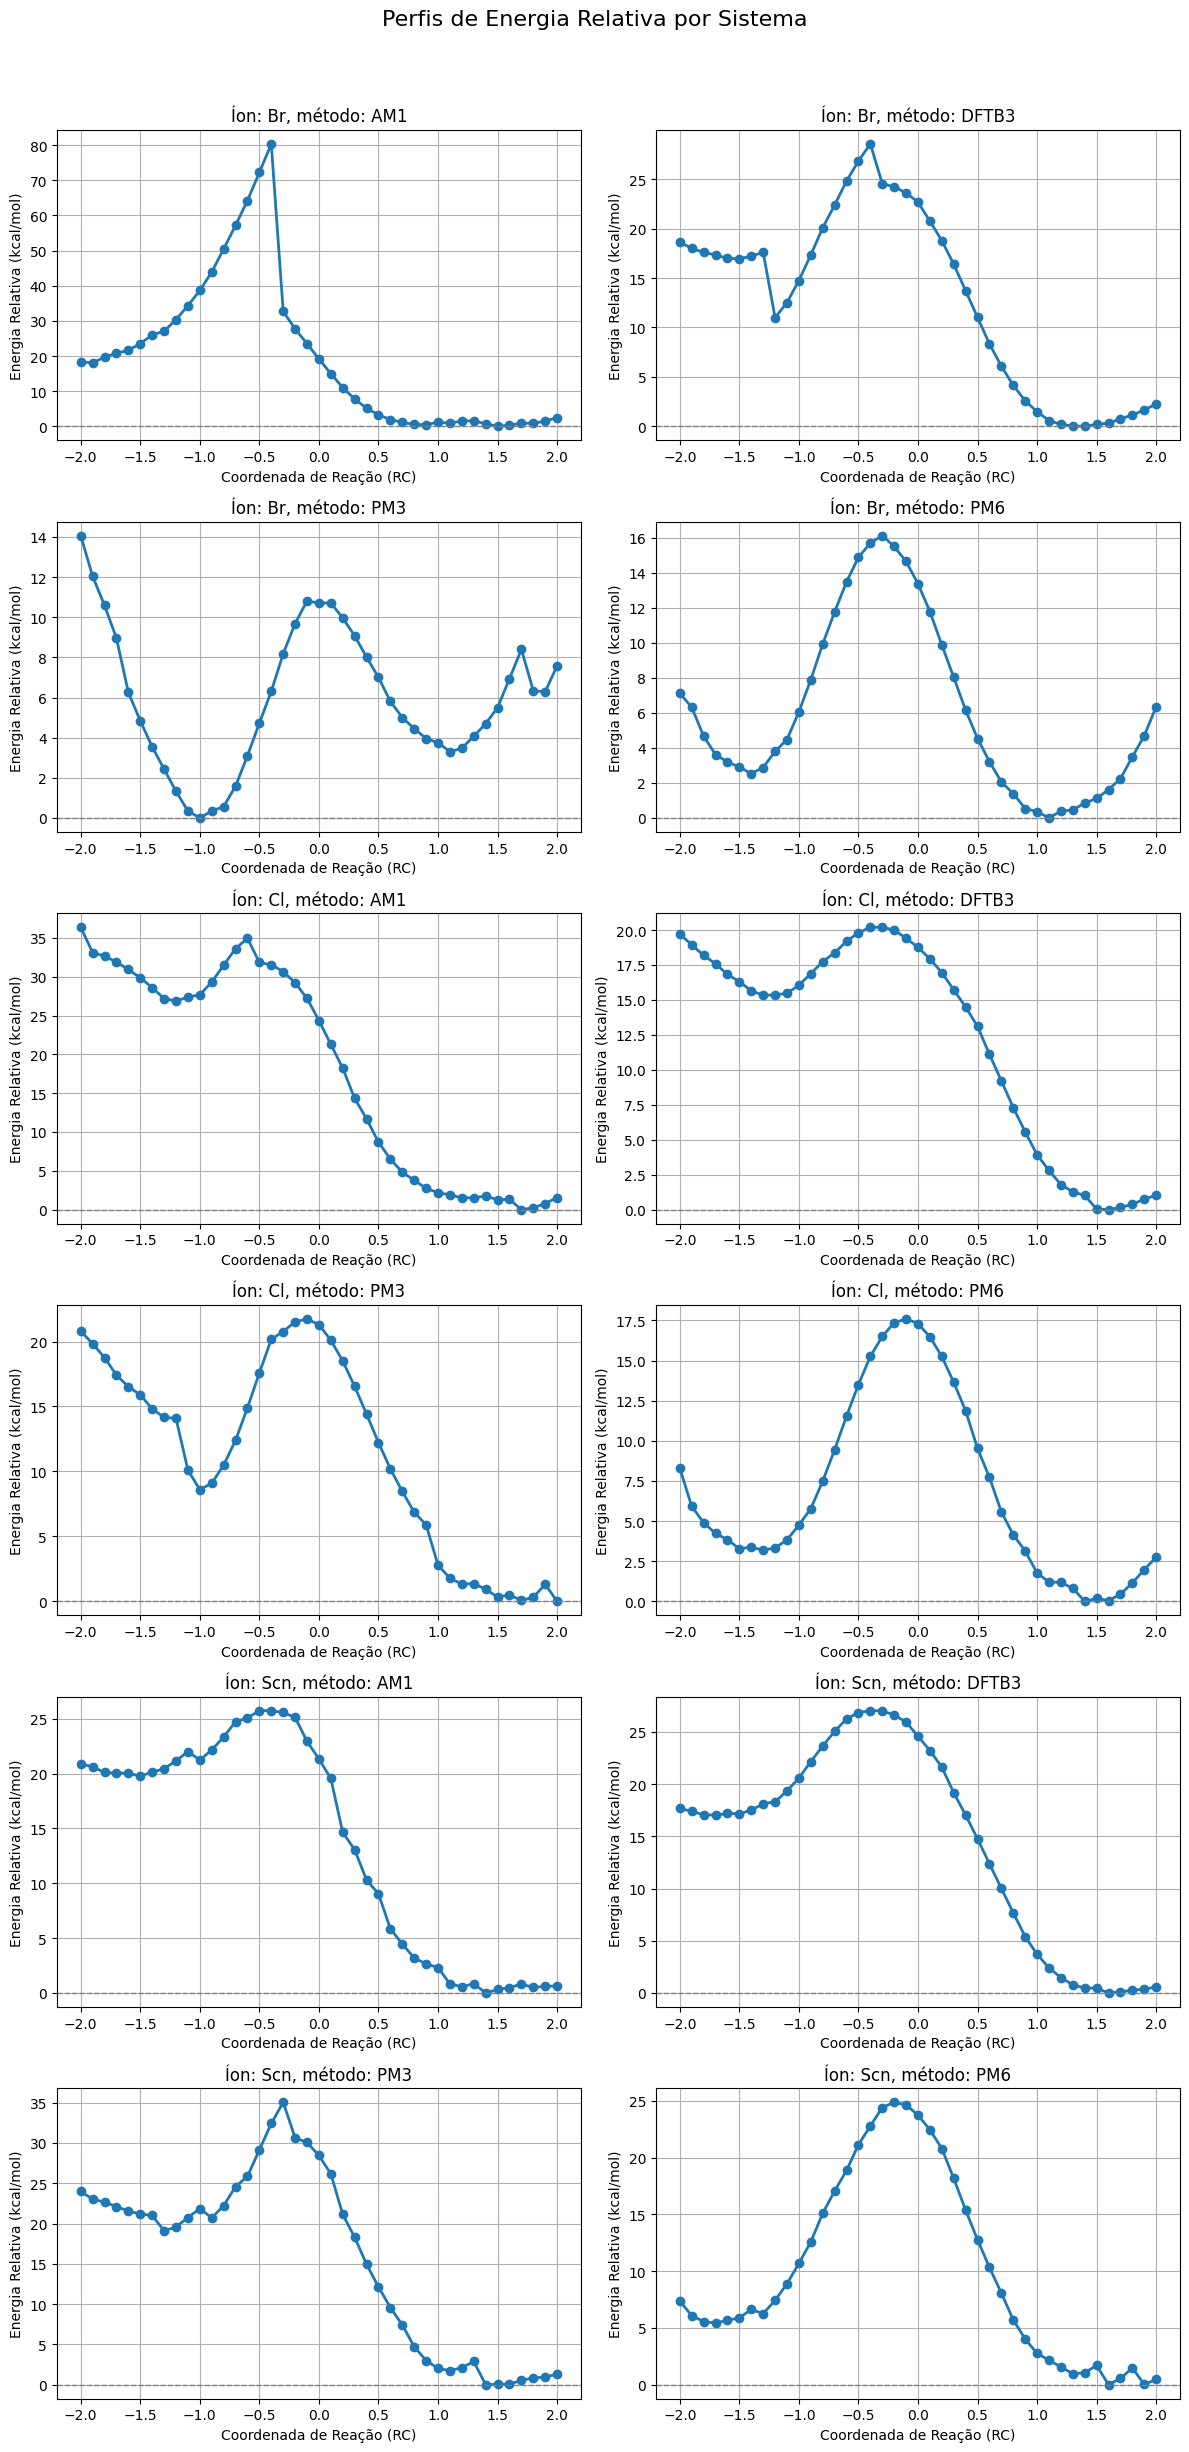

In [5]:
num_systems = len(path)
rows = (num_systems + 1) // 2
cols = 2 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
fig.suptitle("Perfis de Energia Relativa por Sistema", fontsize=16, y=1.02)

if num_systems == 1:
    axes = np.array([axes])

axes = axes.flatten()

for i, current_path in enumerate(path):
    
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    min_energy = df["EAMBER"].min()
    df["E_relativa"] = df["EAMBER"] - min_energy

    ax = axes[i]
    ax.plot(df["RC"], df["E_relativa"], marker='o', linewidth=2)
    ax.set_xlabel("Coordenada de Reação (RC)", fontsize=10)
    ax.set_ylabel("Energia Relativa (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", fontsize=12)
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

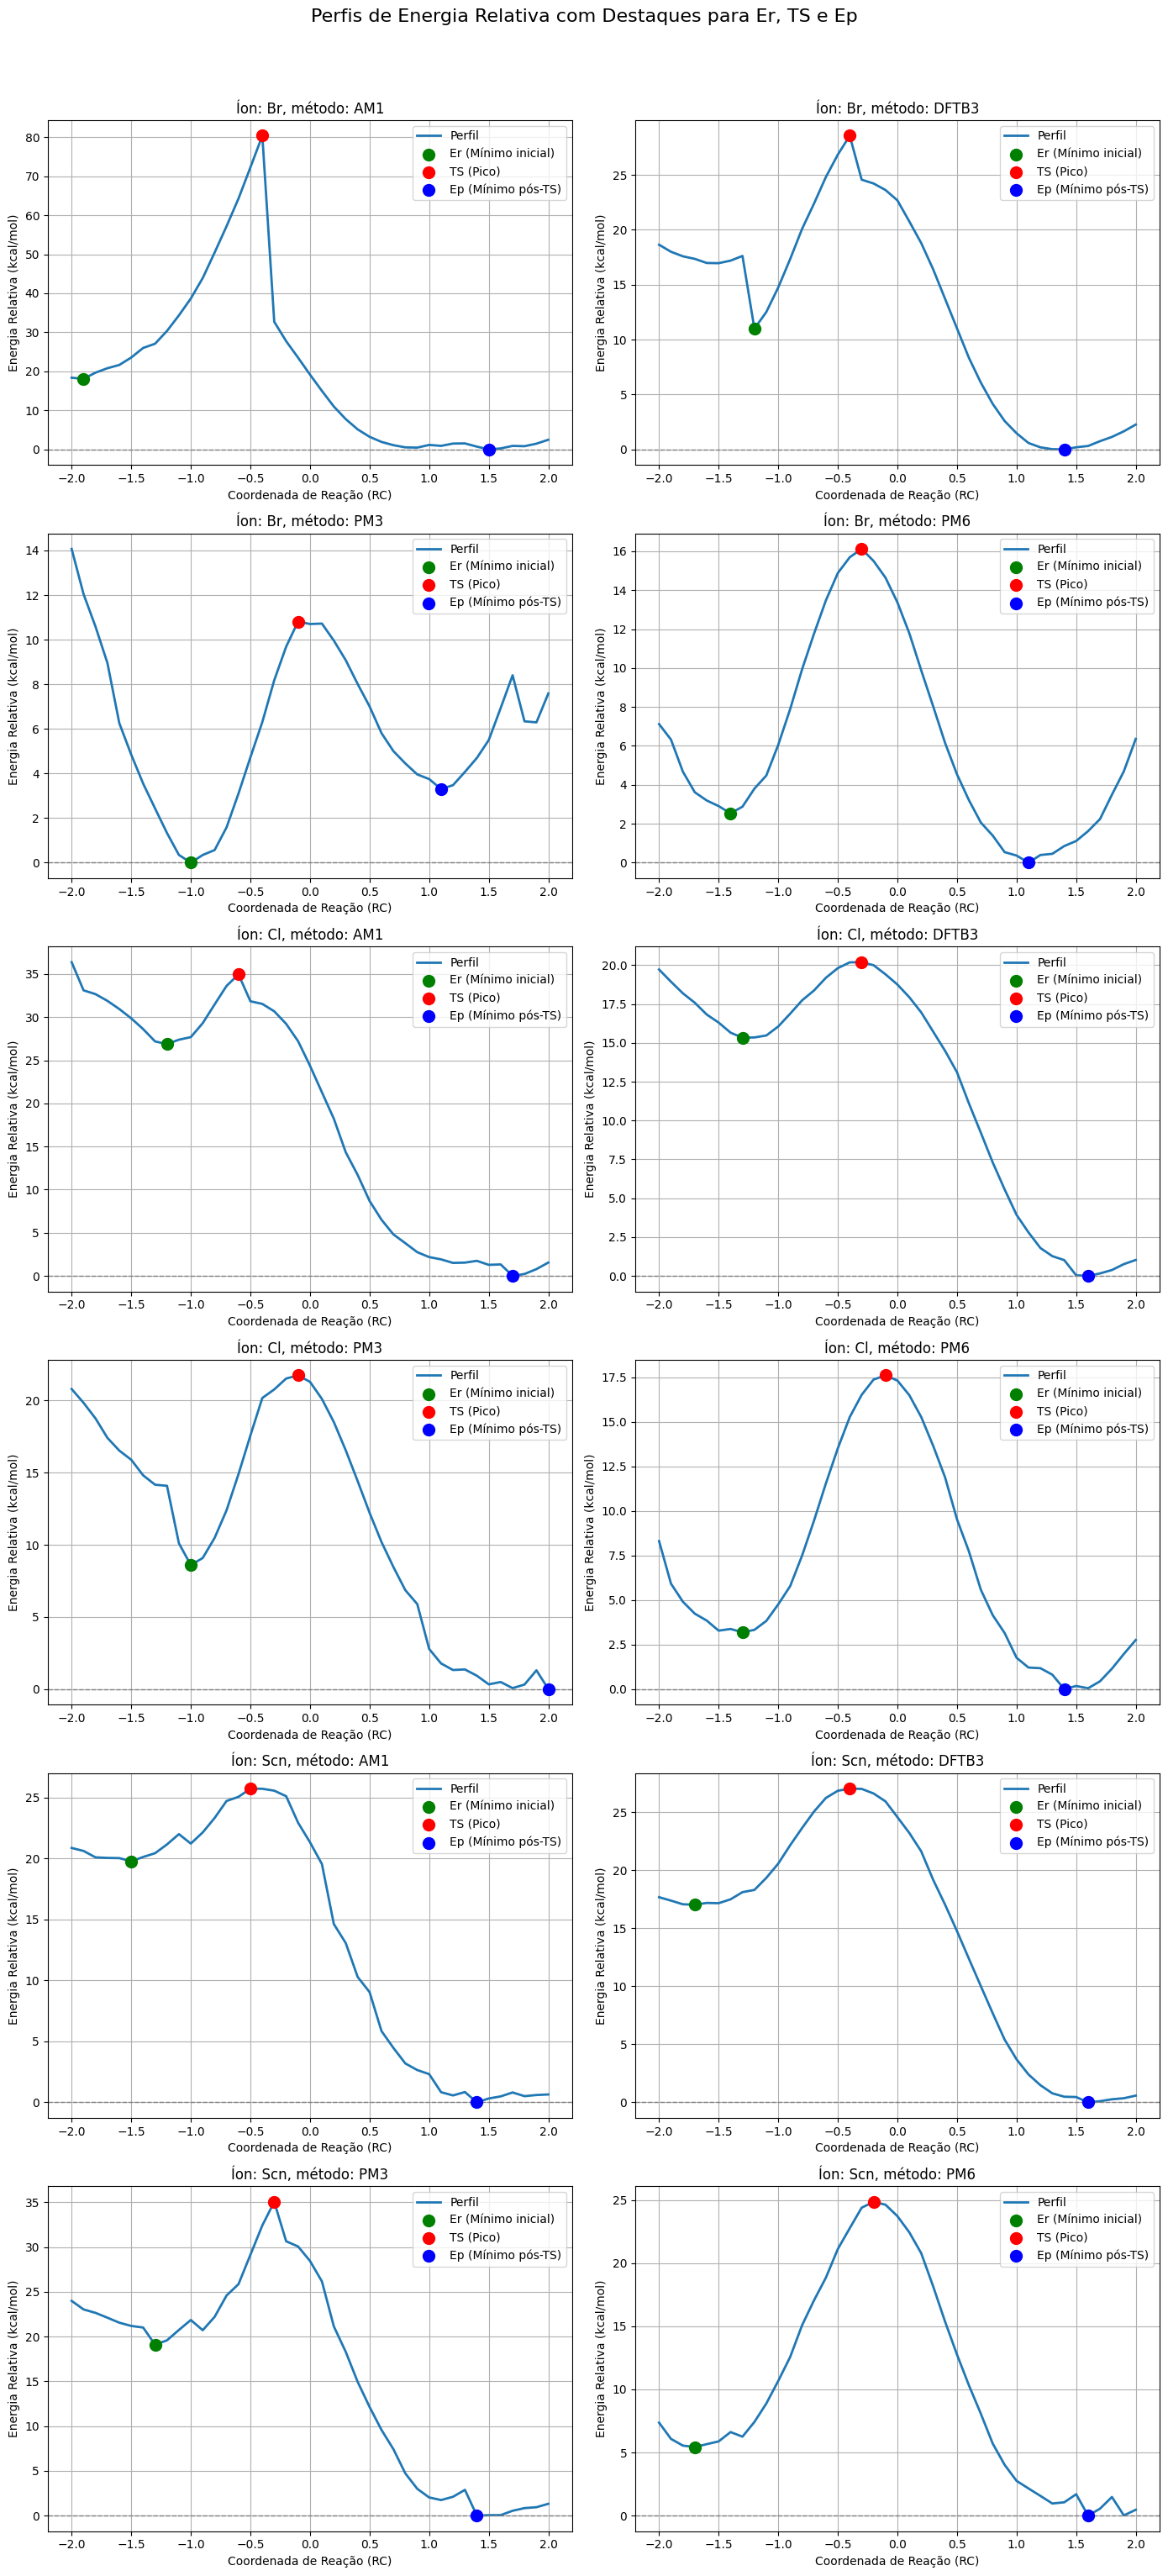

In [6]:
num_systems = len(path)
rows = (num_systems + 1) // 2  # 2 colunas
cols = 2 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle("Perfis de Energia Relativa com Destaques para Er, TS e Ep", fontsize=16, y=1.02)

if num_systems == 1:
    axes = np.array([axes])

axes = axes.flatten()

for i, current_path in enumerate(path):
    
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    df["E_relativa"] = df["EAMBER"] - df["EAMBER"].min()
    
    ts_idx = df[df['RC']>-1]["E_relativa"].idxmax()  # Índice do TS (pico)
    er_idx = df.loc[:ts_idx, "E_relativa"].idxmin()  # Mínimo antes do TS
    ep_idx = df.loc[ts_idx:, "E_relativa"].idxmin()  # Mínimo após o TS
    
    er_rc, er_energy = df.loc[er_idx, "RC"], df.loc[er_idx, "E_relativa"]
    ts_rc, ts_energy = df.loc[ts_idx, "RC"], df.loc[ts_idx, "E_relativa"]
    ep_rc, ep_energy = df.loc[ep_idx, "RC"], df.loc[ep_idx, "E_relativa"]
    
    ax = axes[i]
    ax.plot(df["RC"], df["E_relativa"], marker='', linewidth=2, label="Perfil")
    
    ax.scatter(er_rc, er_energy, color='green', s=100, zorder=5, label="Er (Mínimo inicial)")
    ax.scatter(ts_rc, ts_energy, color='red', s=100, zorder=5, label="TS (Pico)")
    ax.scatter(ep_rc, ep_energy, color='blue', s=100, zorder=5, label="Ep (Mínimo pós-TS)")
    
    ax.set_xlabel("Coordenada de Reação (RC)", fontsize=10)
    ax.set_ylabel("Energia Relativa (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", fontsize=12)
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)
    ax.grid(True)
    ax.legend()

# Remove subplots vazios se houver
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Tabelas

In [7]:
cl = pd.DataFrame([])
br = pd.DataFrame([])
scn = pd.DataFrame([])

for i, current_path in enumerate(path):
    if 'cl-' in current_path[:3]:
        n = current_path.split('-')[-1].upper()
        df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
        df.columns = [k+f'_{n}' for k in df.columns]
        cl = pd.concat([cl, df], axis=1)
    elif 'br-' in current_path[:3]:
        n = current_path.split('-')[-1].upper()
        df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
        df.columns = [k+f'_{n}' for k in df.columns]
        br = pd.concat([br, df], axis=1)
    elif 'scn' in current_path[:3]:
        n = current_path.split('-')[-1].upper()
        df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
        df.columns = [k+f'_{n}' for k in df.columns]
        scn = pd.concat([scn, df], axis=1)

In [8]:
cl

,RC_AM1,EAMBER_AM1,RC_DFTB3,EAMBER_DFTB3,RC_PM3,EAMBER_PM3,RC_PM6,EAMBER_PM6
0,-2.0,-146274.6275,-2.0,-151337.5696,-2.0,-146253.3179,-2.0,-146447.1189
1,-1.9,-146277.8923,-1.9,-151338.3543,-1.9,-146254.2724,-1.9,-146449.5065
2,-1.8,-146278.3329,-1.8,-151339.1021,-1.8,-146255.3532,-1.8,-146450.5216
3,-1.7,-146279.1104,-1.7,-151339.7100,-1.7,-146256.7003,-1.7,-146451.1907
4,-1.6,-146280.0610,-1.6,-151340.4672,-1.6,-146257.5859,-1.6,-146451.5778
5,-1.5,-146281.1414,-1.5,-151340.9860,-1.5,-146258.2194,-1.5,-146452.1427
6,-1.4,-146282.3862,-1.4,-151341.6338,-1.4,-146259.3001,-1.4,-146452.0497
7,-1.3,-146283.8156,-1.3,-151341.9589,-1.3,-146259.9493,-1.3,-146452.2303
8,-1.2,-146284.1226,-1.2,-151341.9419,-1.2,-146260.0259,-1.2,-146452.0987
9,-1.1,-146283.6167,-1.1,-151341.8169,-1.1,-146264.0085,-1.1,-146451.5966


In [9]:
br

,RC_AM1,EAMBER_AM1,RC_DFTB3,EAMBER_DFTB3,RC_PM3,EAMBER_PM3,RC_PM6,EAMBER_PM6
0,-2.0,-146337.9913,-2.0,-151254.3435,-2.0,-145879.8679,-2.0,-146214.6646
1,-1.9,-146338.2808,-1.9,-151254.9848,-1.9,-145881.8947,-1.9,-146215.4617
2,-1.8,-146336.6937,-1.8,-151255.3985,-1.8,-145883.3466,-1.8,-146217.1122
3,-1.7,-146335.5598,-1.7,-151255.6324,-1.7,-145884.9804,-1.7,-146218.1689
4,-1.6,-146334.7211,-1.6,-151256.0059,-1.6,-145887.6817,-1.6,-146218.5909
5,-1.5,-146332.8160,-1.5,-151256.0239,-1.5,-145889.0936,-1.5,-146218.8790
6,-1.4,-146330.3615,-1.4,-151255.7915,-1.4,-145890.3904,-1.4,-146219.2534
7,-1.3,-146329.2833,-1.3,-151255.3662,-1.3,-145891.5076,-1.3,-146218.9080
8,-1.2,-146326.0099,-1.2,-151261.9884,-1.2,-145892.6068,-1.2,-146217.9839
9,-1.1,-146322.0228,-1.1,-151260.4708,-1.1,-145893.5911,-1.1,-146217.3076


In [10]:
scn

,RC_AM1,EAMBER_AM1,RC_DFTB3,EAMBER_DFTB3,RC_PM3,EAMBER_PM3,RC_PM6,EAMBER_PM6
0,-2.0,-145598.0047,-2.0,-151916.9996,-2.0,-145467.5344,-2.0,-146054.8072
1,-1.9,-145598.2505,-1.9,-151917.2955,-1.9,-145468.4896,-1.9,-146056.0967
2,-1.8,-145598.7737,-1.8,-151917.6111,-1.8,-145468.8716,-1.8,-146056.6289
3,-1.7,-145598.8205,-1.7,-151917.6479,-1.7,-145469.4124,-1.7,-146056.7434
4,-1.6,-145598.8378,-1.6,-151917.4949,-1.6,-145469.9714,-1.6,-146056.5133
5,-1.5,-145599.1034,-1.5,-151917.5166,-1.5,-145470.3345,-1.5,-146056.2954
6,-1.4,-145598.7443,-1.4,-151917.1825,-1.4,-145470.5130,-1.4,-146055.5555
7,-1.3,-145598.4360,-1.3,-151916.5651,-1.3,-145472.4310,-1.3,-146055.9196
8,-1.2,-145597.7142,-1.2,-151916.3748,-1.2,-145471.9420,-1.2,-146054.7548
9,-1.1,-145596.8709,-1.1,-151915.3337,-1.1,-145470.7830,-1.1,-146053.2917


# Região Pequena

In [11]:
_ = len('SmallQM-')
path = [i for i in os.listdir() if i[_:_+3] in ['cl-', 'br-', 'scn']]
path

['SmallQM-br-qmmm-am1',
 'SmallQM-br-qmmm-dftb3',
 'SmallQM-br-qmmm-pm3',
 'SmallQM-br-qmmm-pm6',
 'SmallQM-cl-qmmm-am1',
 'SmallQM-cl-qmmm-dftb3',
 'SmallQM-cl-qmmm-pm3',
 'SmallQM-cl-qmmm-pm6',
 'SmallQM-scn-qmmm-am1',
 'SmallQM-scn-qmmm-dftb3',
 'SmallQM-scn-qmmm-pm3',
 'SmallQM-scn-qmmm-pm6']

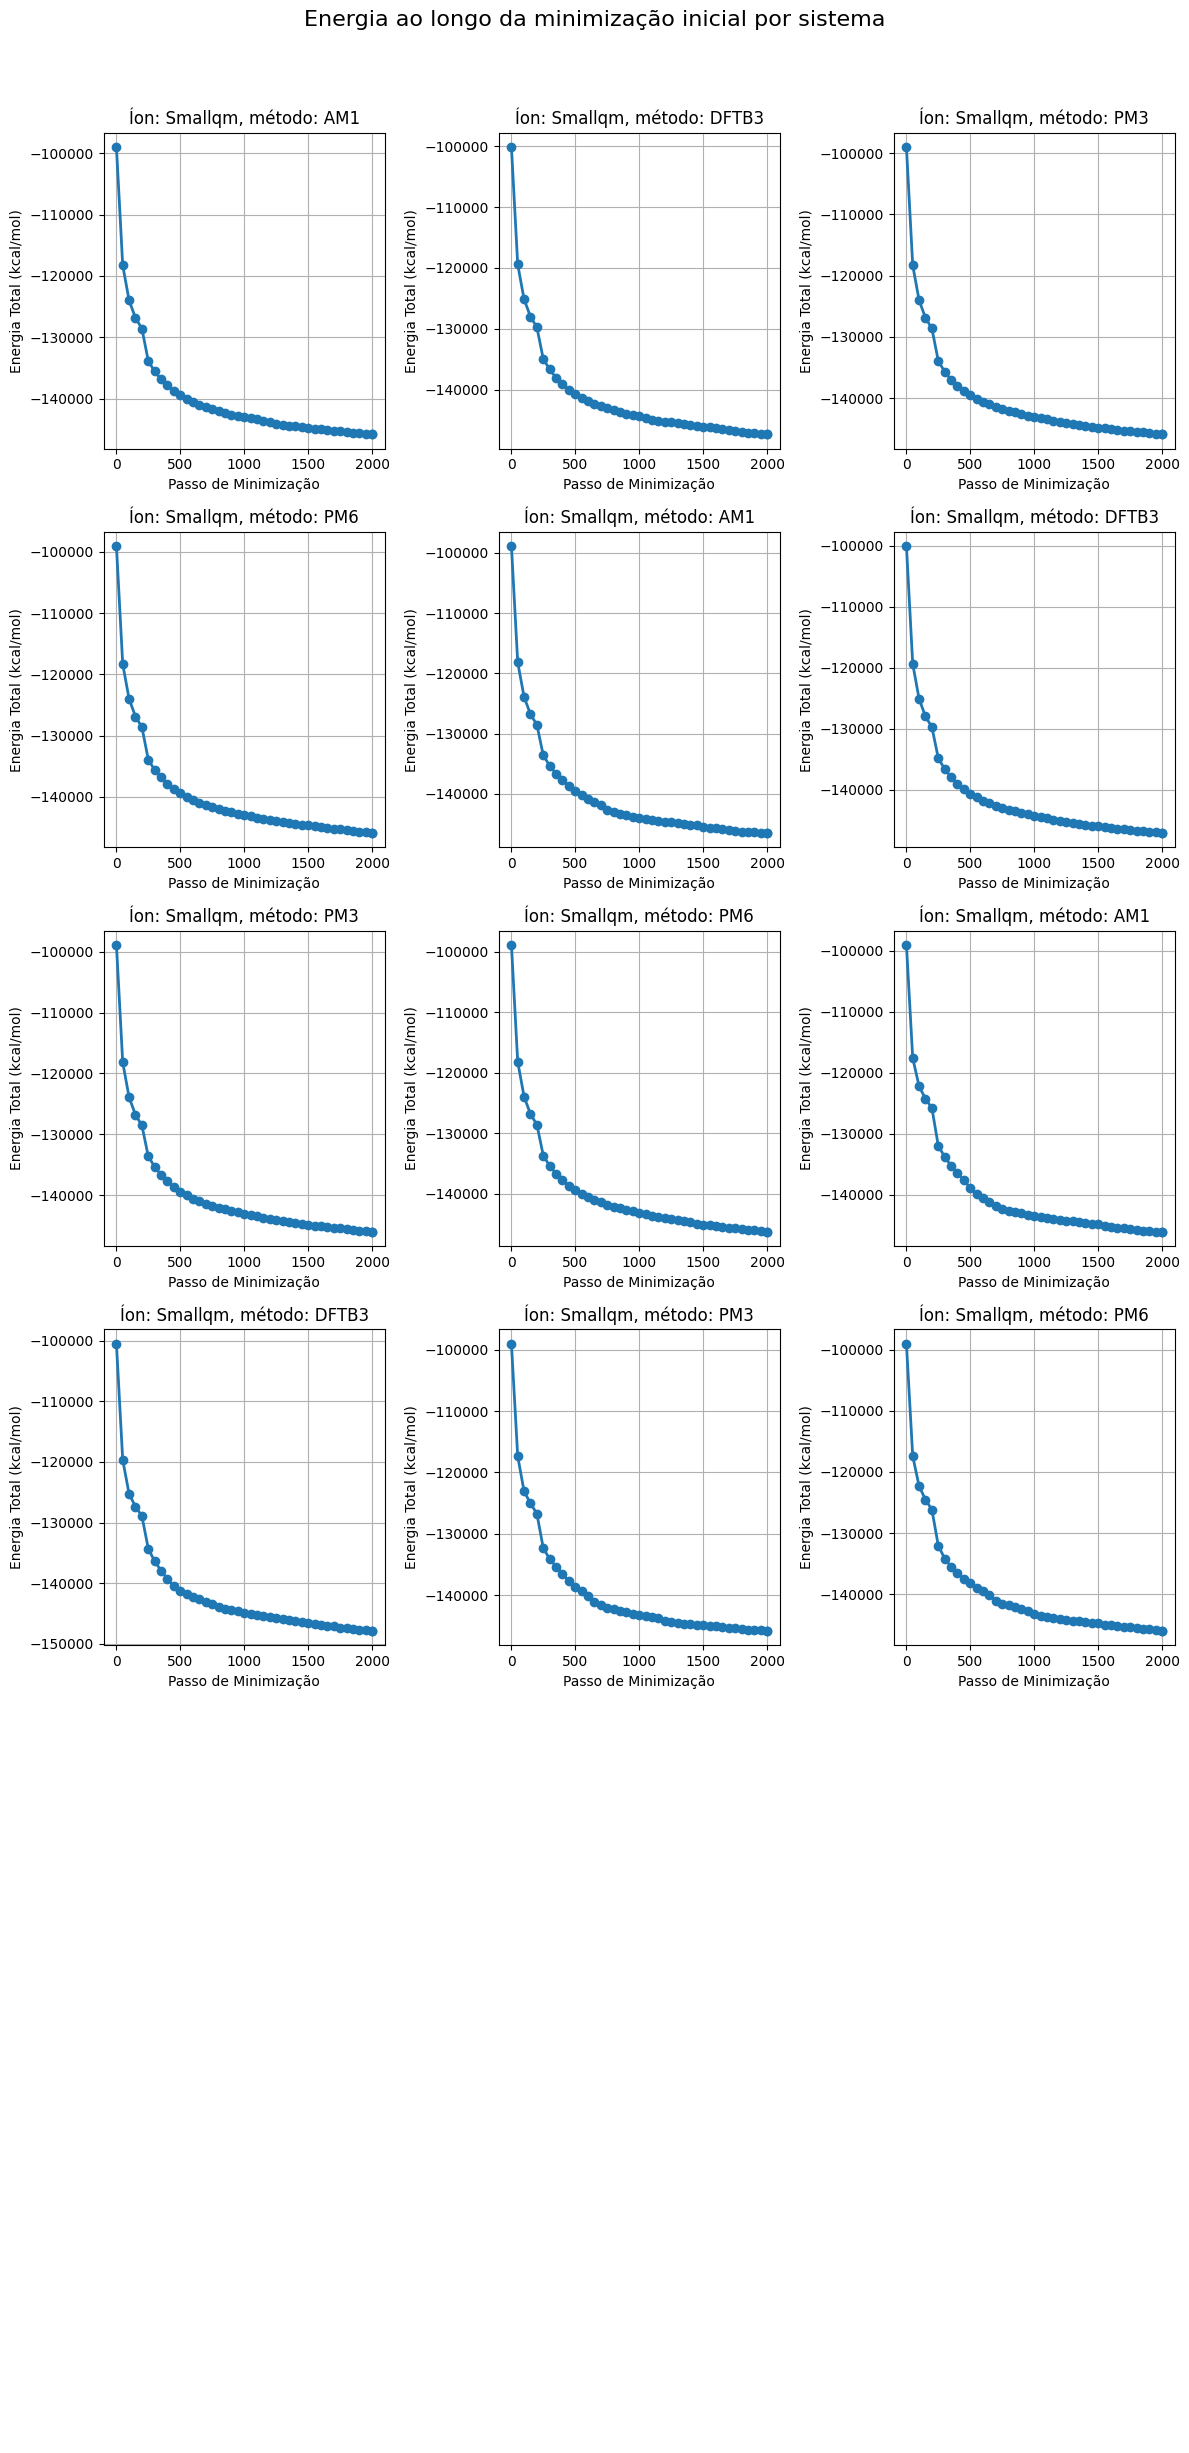

In [12]:
num_systems = len(path)
rows = (num_systems + 1) // 2
cols = 3 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
fig.suptitle("Energia ao longo da minimização inicial por sistema", fontsize=16, y=1.02)

# Se tivermos apenas um sistema, axes não será um array
if num_systems == 1:
    axes = np.array([axes])

# Achatar o array de eixos para facilitar a iteração
axes = axes.flatten()

for i, current_path in enumerate(path):
    steps = []
    energies = []
    
    with open(f"{current_path}/min.init.log") as f:
        for line in f:
            if re.match(r'^\s*\d+\s+-?\d+\.\d+', line):
                parts = line.split()
                try:
                    steps.append(int(parts[0]))
                    energies.append(float(parts[1]))
                except (IndexError, ValueError):
                    continue
    
    ax = axes[i]
    ax.plot(steps, energies, marker='o', linewidth=2)
    ax.set_xlabel("Passo de Minimização", fontsize=10)
    ax.set_ylabel("Energia Total (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", 
                 fontsize=12)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

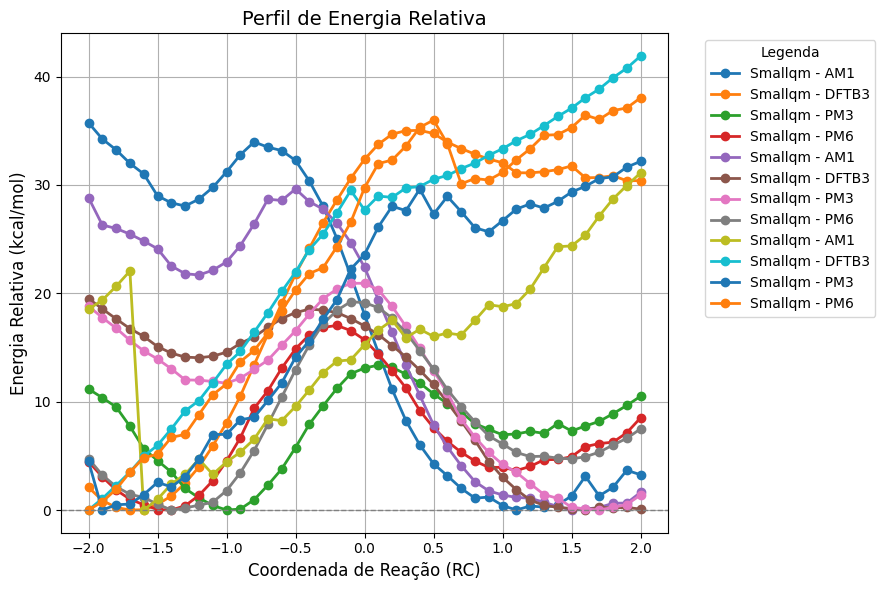

In [13]:
plt.figure(figsize=(9, 6))

colors = plt.cm.viridis(np.linspace(0, 1, len(path)))

for i, current_path in enumerate(path):
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    
    min_energy = df["EAMBER"].min()
    df["E_relativa"] = df["EAMBER"] - min_energy
    
    plt.plot(
        df["RC"], 
        df["E_relativa"], 
        marker='o', 
        linewidth=2,
        label=f"{current_path.split('-')[0].title()} - {current_path.split('-')[-1].upper()}", 
        #color=colors[i]  # Usa cores diferentes
    )

plt.xlabel("Coordenada de Reação (RC)", fontsize=12)
plt.ylabel("Energia Relativa (kcal/mol)", fontsize=12)
plt.title("Perfil de Energia Relativa", fontsize=14)
plt.axhline(0, linestyle='--', color='gray', linewidth=1)
plt.grid(True)
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

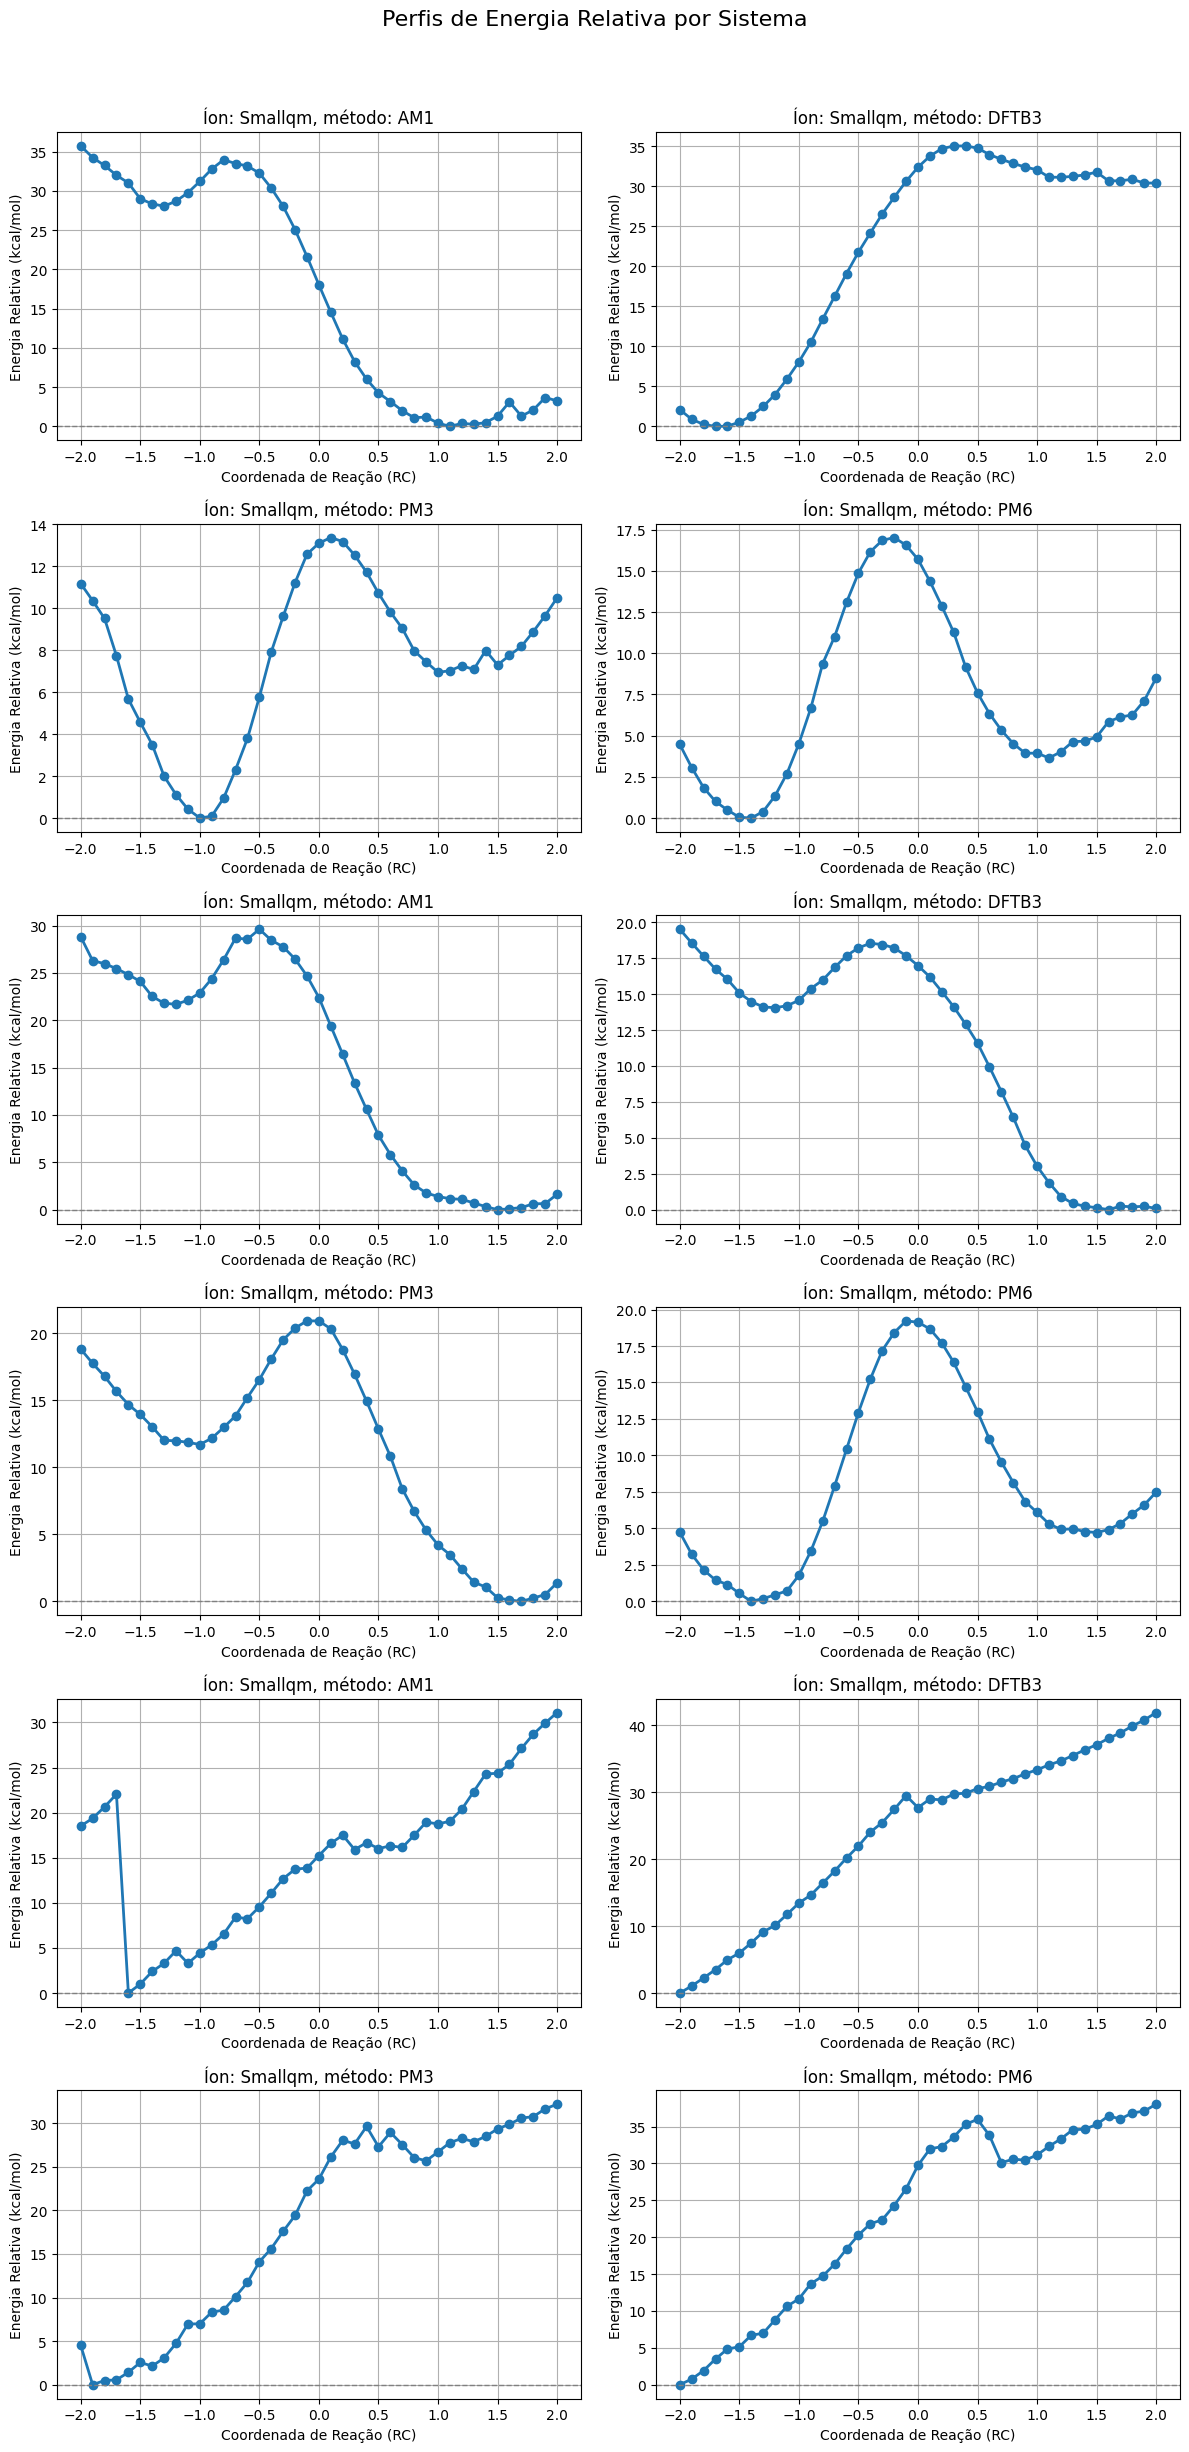

In [14]:
num_systems = len(path)
rows = (num_systems + 1) // 2
cols = 2 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
fig.suptitle("Perfis de Energia Relativa por Sistema", fontsize=16, y=1.02)

if num_systems == 1:
    axes = np.array([axes])

axes = axes.flatten()

for i, current_path in enumerate(path):
    
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    min_energy = df["EAMBER"].min()
    df["E_relativa"] = df["EAMBER"] - min_energy

    ax = axes[i]
    ax.plot(df["RC"], df["E_relativa"], marker='o', linewidth=2)
    ax.set_xlabel("Coordenada de Reação (RC)", fontsize=10)
    ax.set_ylabel("Energia Relativa (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", fontsize=12)
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)
    ax.grid(True)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

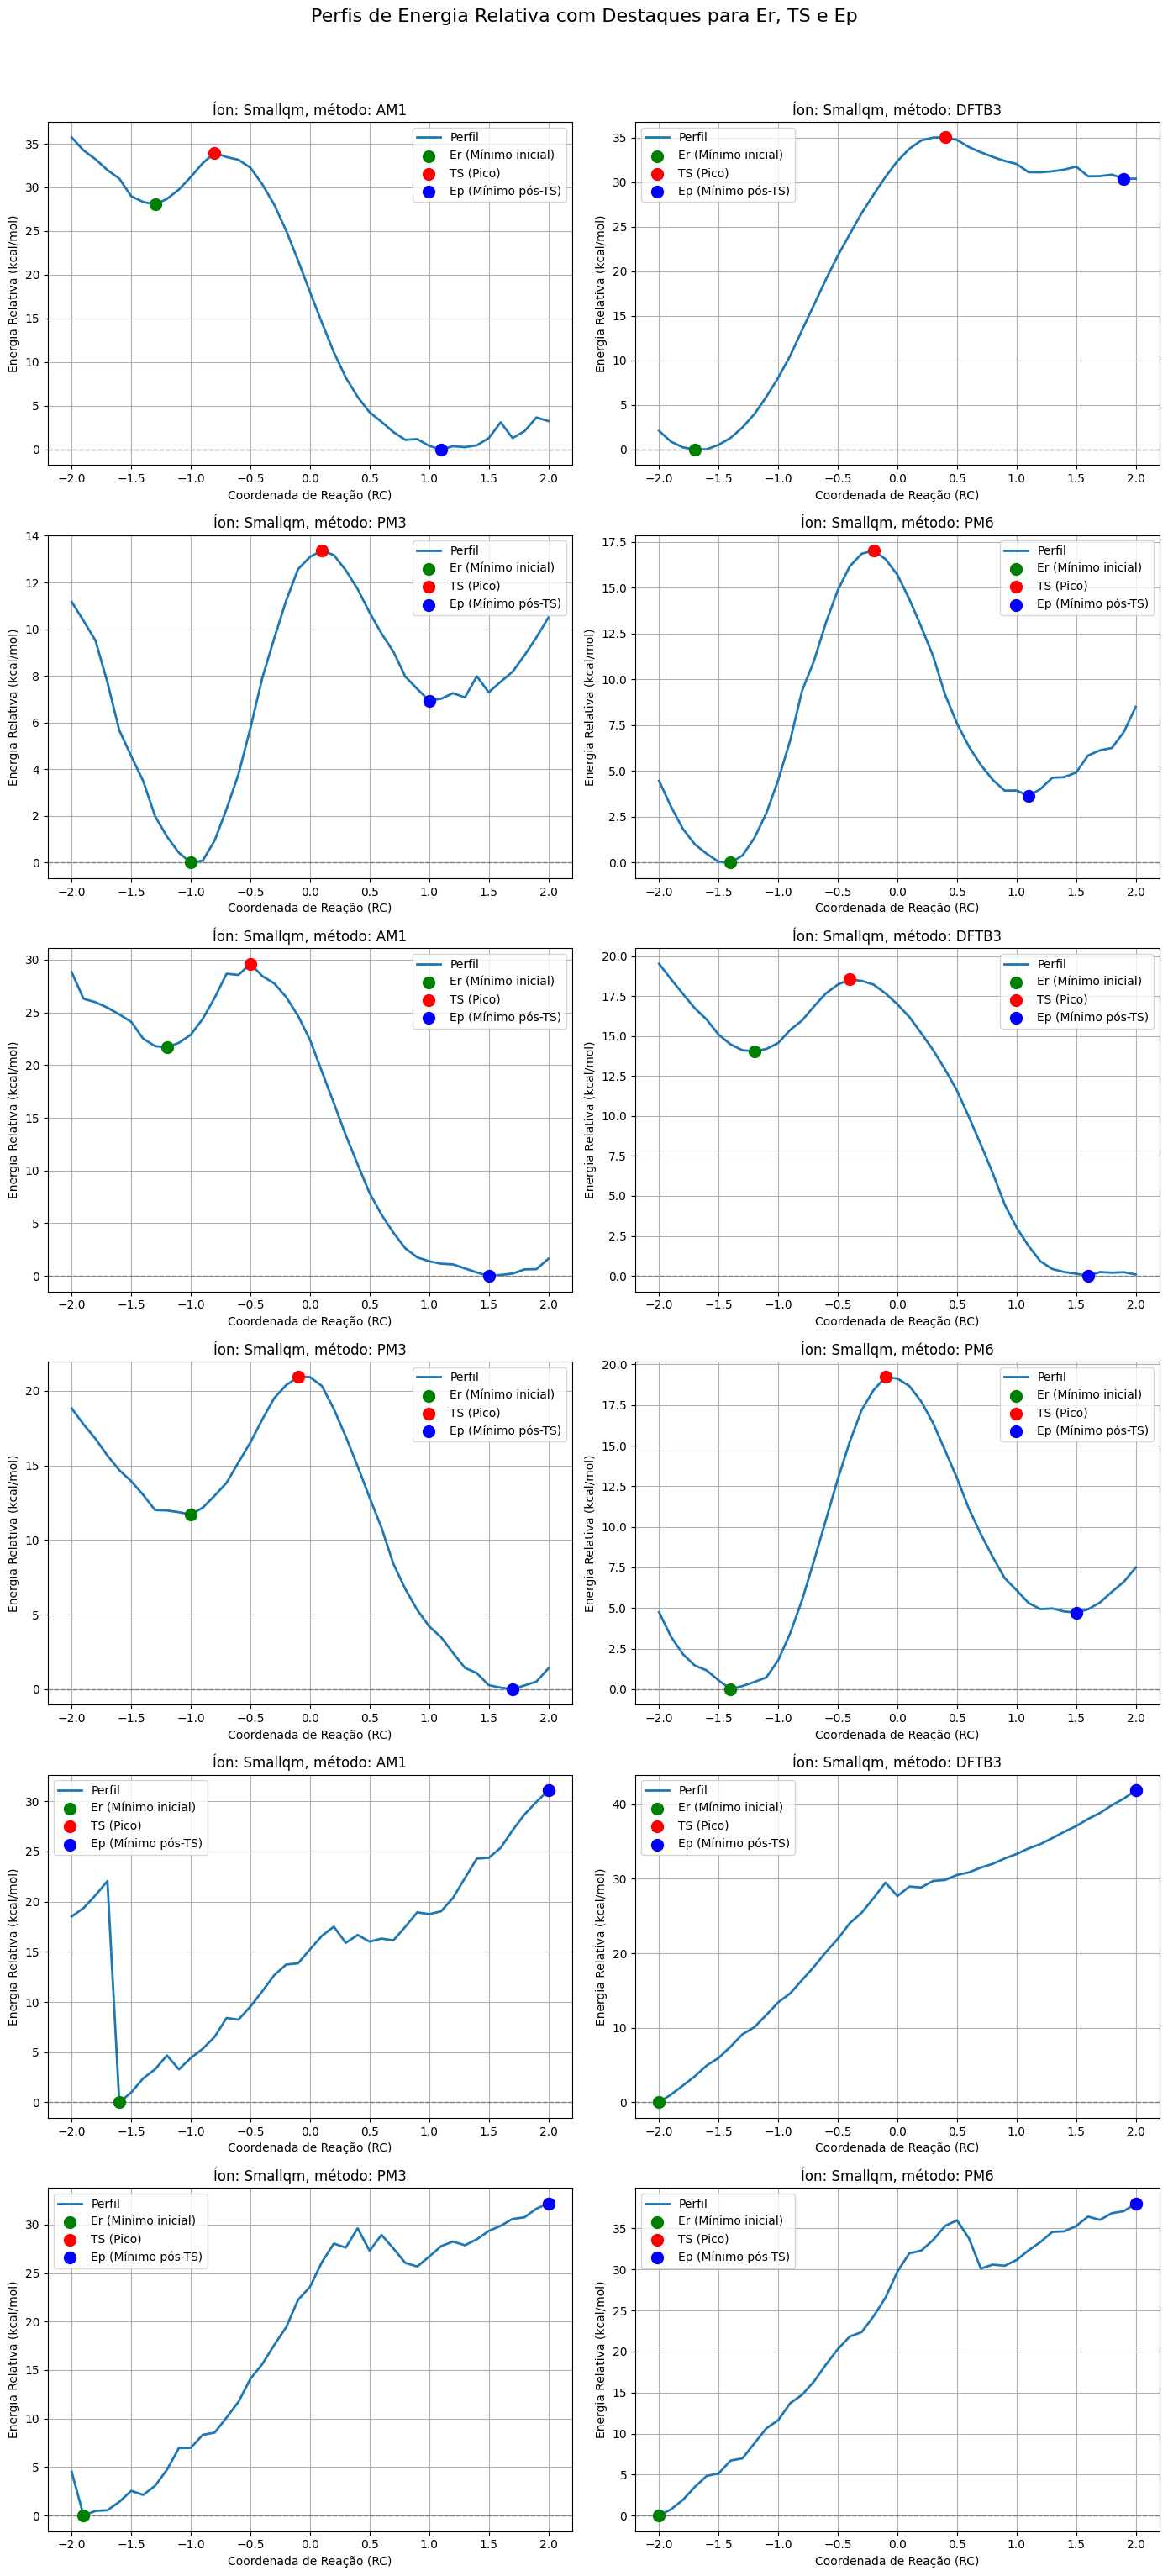

In [15]:
num_systems = len(path)
rows = (num_systems + 1) // 2  # 2 colunas
cols = 2 if num_systems > 1 else 1

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
fig.suptitle("Perfis de Energia Relativa com Destaques para Er, TS e Ep", fontsize=16, y=1.02)

if num_systems == 1:
    axes = np.array([axes])

axes = axes.flatten()

for i, current_path in enumerate(path):
    
    df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
    df["E_relativa"] = df["EAMBER"] - df["EAMBER"].min()
    
    ts_idx = df[df['RC']>-1]["E_relativa"].idxmax()  # Índice do TS (pico)
    er_idx = df.loc[:ts_idx, "E_relativa"].idxmin()  # Mínimo antes do TS
    ep_idx = df.loc[ts_idx:, "E_relativa"].idxmin()  # Mínimo após o TS
    
    er_rc, er_energy = df.loc[er_idx, "RC"], df.loc[er_idx, "E_relativa"]
    ts_rc, ts_energy = df.loc[ts_idx, "RC"], df.loc[ts_idx, "E_relativa"]
    ep_rc, ep_energy = df.loc[ep_idx, "RC"], df.loc[ep_idx, "E_relativa"]
    
    ax = axes[i]
    ax.plot(df["RC"], df["E_relativa"], marker='', linewidth=2, label="Perfil")
    
    ax.scatter(er_rc, er_energy, color='green', s=100, zorder=5, label="Er (Mínimo inicial)")
    ax.scatter(ts_rc, ts_energy, color='red', s=100, zorder=5, label="TS (Pico)")
    ax.scatter(ep_rc, ep_energy, color='blue', s=100, zorder=5, label="Ep (Mínimo pós-TS)")
    
    ax.set_xlabel("Coordenada de Reação (RC)", fontsize=10)
    ax.set_ylabel("Energia Relativa (kcal/mol)", fontsize=10)
    ax.set_title(f"Íon: {current_path.split('-')[0].title()}, método: {current_path.split('-')[-1].upper()}", fontsize=12)
    ax.axhline(0, linestyle='--', color='gray', linewidth=1)
    ax.grid(True)
    ax.legend()

# Remove subplots vazios se houver
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

## Tabelas

In [16]:
cl = pd.DataFrame([])
br = pd.DataFrame([])
scn = pd.DataFrame([])

for i, current_path in enumerate(path):
    if 'cl-' in current_path[_:_+3]:
        n = current_path.split('-')[-1].upper()
        df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
        df.columns = [k+f'_{n}' for k in df.columns]
        cl = pd.concat([cl, df], axis=1)
    elif 'br-' in current_path[_:_+3]:
        n = current_path.split('-')[-1].upper()
        df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
        df.columns = [k+f'_{n}' for k in df.columns]
        br = pd.concat([br, df], axis=1)
    elif 'scn' in current_path[_:_+3]:
        n = current_path.split('-')[-1].upper()
        df = pd.read_csv(f"{current_path}/energies.dat", sep='\t')
        df.columns = [k+f'_{n}' for k in df.columns]
        scn = pd.concat([scn, df], axis=1)

In [17]:
cl

,RC_AM1,EAMBER_AM1,RC_DFTB3,EAMBER_DFTB3,RC_PM3,EAMBER_PM3,RC_PM6,EAMBER_PM6
0,-2.0,-146481.1259,-2.0,-147050.5123,-2.0,-146053.3397,-2.0,-146263.8913
1,-1.9,-146483.6490,-1.9,-147051.4715,-1.9,-146054.4097,-1.9,-146265.4011
2,-1.8,-146483.9712,-1.8,-147052.3904,-1.8,-146055.3769,-1.8,-146266.4731
3,-1.7,-146484.4906,-1.7,-147053.2914,-1.7,-146056.5035,-1.7,-146267.1741
4,-1.6,-146485.1308,-1.6,-147054.0026,-1.6,-146057.4805,-1.6,-146267.4758
5,-1.5,-146485.8405,-1.5,-147054.9480,-1.5,-146058.2215,-1.5,-146268.0899
6,-1.4,-146487.4313,-1.4,-147055.5507,-1.4,-146059.1349,-1.4,-146268.6304
7,-1.3,-146488.1456,-1.3,-147055.9181,-1.3,-146060.1530,-1.3,-146268.4381
8,-1.2,-146488.2629,-1.2,-147055.9779,-1.2,-146060.1814,-1.2,-146268.1859
9,-1.1,-146487.8274,-1.1,-147055.8371,-1.1,-146060.2974,-1.1,-146267.9083


In [18]:
br

,RC_AM1,EAMBER_AM1,RC_DFTB3,EAMBER_DFTB3,RC_PM3,EAMBER_PM3,RC_PM6,EAMBER_PM6
0,-2.0,-145787.6109,-2.0,-147287.3350,-2.0,-145851.6845,-2.0,-145894.2475
1,-1.9,-145789.1064,-1.9,-147288.5499,-1.9,-145852.4957,-1.9,-145895.6514
2,-1.8,-145790.1114,-1.8,-147289.1880,-1.8,-145853.3461,-1.8,-145896.8688
3,-1.7,-145791.3556,-1.7,-147289.4302,-1.7,-145855.1279,-1.7,-145897.7111
4,-1.6,-145792.3348,-1.6,-147289.4068,-1.6,-145857.1856,-1.6,-145898.2306
5,-1.5,-145794.3511,-1.5,-147288.9066,-1.5,-145858.2934,-1.5,-145898.6672
6,-1.4,-145795.0012,-1.4,-147288.1346,-1.4,-145859.3552,-1.4,-145898.7150
7,-1.3,-145795.2933,-1.3,-147286.9492,-1.3,-145860.8637,-1.3,-145898.3218
8,-1.2,-145794.6574,-1.2,-147285.4567,-1.2,-145861.7397,-1.2,-145897.3685
9,-1.1,-145793.5814,-1.1,-147283.5270,-1.1,-145862.4324,-1.1,-145896.0142


In [19]:
scn

,RC_AM1,EAMBER_AM1,RC_DFTB3,EAMBER_DFTB3,RC_PM3,EAMBER_PM3,RC_PM6,EAMBER_PM6
0,-2.0,-146065.1495,-2.0,-147799.6587,-2.0,-145774.2632,-2.0,-145958.9043
1,-1.9,-146064.3036,-1.9,-147798.6065,-1.9,-145778.7762,-1.9,-145958.1447
2,-1.8,-146063.0329,-1.8,-147797.4034,-1.8,-145778.2962,-1.8,-145956.9897
3,-1.7,-146061.6193,-1.7,-147796.1551,-1.7,-145778.2247,-1.7,-145955.4137
4,-1.6,-146083.6722,-1.6,-147794.7001,-1.6,-145777.3581,-1.6,-145954.0686
5,-1.5,-146082.6797,-1.5,-147793.6871,-1.5,-145776.2216,-1.5,-145953.7615
6,-1.4,-146081.2811,-1.4,-147792.1787,-1.4,-145776.6428,-1.4,-145952.2009
7,-1.3,-146080.3712,-1.3,-147790.5164,-1.3,-145775.7084,-1.3,-145951.9282
8,-1.2,-146078.9891,-1.2,-147789.5643,-1.2,-145774.0453,-1.2,-145950.0977
9,-1.1,-146080.3798,-1.1,-147787.9232,-1.1,-145771.8125,-1.1,-145948.2701
